# Initialisation

In [1]:
from SL_model import SL_model
from spharm import legendre, GaussQuad
from spharm import sphericalobject
from time import time
import numpy as np
def load_model(out,love_way,out_2):
    if __name__ == '__main__':
        ice_way='ice6g_data'
        sed_way='Irrawady_sedimentationgrid'
        topo_way='topo_SL'
        model=SL_model(maxdeg=255,nb_workers=12,topo_it_max=10,k_max=10) # Generate the model base
        model.set_from_file('C:/Users/ahenry01/Desktop/Python_code/SL_C0de_output/'+out)
        model.data_way='C:/Users/ahenry01/Desktop/Python_code/SL_C0de_data/'
        print('model_created')
        model.love_way=model.data_way+love_way
        model.ice_way=model.data_way+ice_way
        model.sed_way=model.data_way+sed_way
        model.topo_way=model.data_way+topo_way
        model.P_lm=legendre(model.maxdeg,model.pool) #Calculate the Legendre associated functions for the Gaussian grid
        model.x, model.w= GaussQuad(model.maxdeg) # calculate the Gaussian grid parameters

        model.create_GRID() #create the grid framework

        model.create_parameters() #Create all grid parameters


        model.ice.quick_load(model.grid,model.pool,model.ice_way) #set the ice model
        model.sed.load(model,model.sed_way) # set the sedimentation model
        model.topo.load(model,model.topo_way) # set the topography model, this function need the sediment and ice model ! 
        #Disk_load=model.grid.disk(model,0,180,1,100)
        # we need to calculate the ocean function after setting the topography due to it's dependencies
        model.create_ocean(model.topo.topo_pres) # create the ocean function (see theoria (TABOO), spada et al., 2003) from the actual topography.
        model.sed.rho=model.data['rho_sed']
        model.oc.rho=model.data['rho_sea']
        model.ice.rho=model.data['rho_ice']
        model.grid.time_step=model.time_step
        model.ice.ice_corrected=model.data['ice_corrected']
        model.SL.delS.saved=model.data['delS']
        model.SL.sdelS.saved=model.data['sdelS']
        model.topo.topo=model.data['topo']
        print('preload')
        import joblib
        import pickle
        if out=='Article Irrawaddy/base.VM5a.l60.um21.lm22.699result_27.09.2022_17.37.42':
            way='C:/Users/ahenry01/Desktop/Python_code/SL_C0de_output/'+out_2
            with open(way+'.pkl', 'rb') as handle:
                        data = joblib.load(handle)
            model.delR_e_o=data['delR_e_o']
            model.delR_e_s=data['delR_e_s']
            model.delR_e_i=data['delR_e_i']
            model.delR_v_o=data['delR_v_o']
            model.delR_v_s=data['delR_v_s']
            model.delR_v_i=data['delR_v_i']
            model.delR_e_s_o=model.delR_e_s-model.delR_e_s*model.oc.rho/model.sed.rho
            model.delR_v_s_o=model.delR_v_s-model.delR_v_s*model.oc.rho/model.sed.rho
            model.delR_e_o_s=model.delR_e_o+model.delR_e_s*model.oc.rho/model.sed.rho
            model.delR_v_o_s=model.delR_v_o+model.delR_v_s*model.oc.rho/model.sed.rho
            model.delG_e_o=data['delG_e_o']
            model.delG_e_s=data['delG_e_s']
            model.delG_e_i=data['delG_e_i']
            model.delG_v_o=data['delG_v_o']
            model.delG_v_s=data['delG_v_s']
            model.delG_v_i=data['delG_v_i']
            model.delG_e_s_o=model.delG_e_s-model.delG_e_s*model.oc.rho/model.sed.rho
            model.delG_v_s_o=model.delG_v_s-model.delG_v_s*model.oc.rho/model.sed.rho
            model.delG_e_o_s=model.delG_e_o+model.delG_e_s*model.oc.rho/model.sed.rho
            model.delG_v_o_s=model.delG_v_o+model.delG_v_s*model.oc.rho/model.sed.rho
            model.delSL=data['delSL']
            model.ESL=data['ESL']
        else :
            way='C:/Users/ahenry01/Desktop/Python_code/SL_C0de_output/'+out_2
            with open(way+'.pkl', 'rb') as handle:
                        data = pickle.load(handle)
            model.delR_e_o=data['delR_e_o']
            model.delR_e_s=data['delR_e_s']
            model.delR_e_i=data['delR_e_i']
            model.delR_v_o=data['delR_v_o']
            model.delR_v_s=data['delR_v_s']
            model.delR_v_i=data['delR_v_i']
            model.delR_e_s_o=model.delR_e_s-model.delR_e_s*model.oc.rho/model.sed.rho
            model.delR_v_s_o=model.delR_v_s-model.delR_v_s*model.oc.rho/model.sed.rho
            model.delR_e_o_s=model.delR_e_o+model.delR_e_s*model.oc.rho/model.sed.rho
            model.delR_v_o_s=model.delR_v_o+model.delR_v_s*model.oc.rho/model.sed.rho
            model.delG_e_o=data['delG_e_o']
            model.delG_e_s=data['delG_e_s']
            model.delG_e_i=data['delG_e_i']
            model.delG_v_o=data['delG_v_o']
            model.delG_v_s=data['delG_v_s']
            model.delG_v_i=data['delG_v_i']
            model.delG_e_s_o=model.delG_e_s-model.delG_e_s*model.oc.rho/model.sed.rho
            model.delG_v_s_o=model.delG_v_s-model.delG_v_s*model.oc.rho/model.sed.rho
            model.delG_e_o_s=model.delG_e_o+model.delG_e_s*model.oc.rho/model.sed.rho
            model.delG_v_o_s=model.delG_v_o+model.delG_v_s*model.oc.rho/model.sed.rho
            model.delSL=data['delSL']
            model.ESL=data['ESL']
        print('next')
        del(data)
        print('end')
        return model

def calc_diff(c,ind,time_step,model):
    delc=(c[ind,:]-c[ind-1,:])/(time_step[ind]-time_step[ind-1])/1000
    return sphericalobject(delc,'coeff').coefftogrd_hd(model)

# Calcul de la déformation du géoïde et de la terre

# Initialize plots parameters

In [2]:
# set figure output
way='C:/Users/ahenry01/Desktop/Python_code/figure_output/vl_comparison/'

In [3]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'Times New Roman'})
plt.rcParams.update({'savefig.bbox':'tight'})
model=load_model('Article Irrawaddy/base.VM5a.l60.um21.lm22.699result_27.09.2022_17.37.42','base/VM5a.l60.um21.lm22.699','Article Irrawaddy/base.VM5a.l60.um21.lm22.699_postt')
model.init_resolution_plot(1024)
time_step=model.time_step_number
time_list=model.time_step
elons_res,lats_res=np.meshgrid(model.elons_res,model.lats_res)
sediment_color=(0.4,0.7,0.5)
sediment_color_dark=(0.2,0.4,0.25)
ice_color=(0.1,0.8,0.8)
ocean_color=(0.2,0.2,0.6)
lat_map=[12,20]
lon_map=[90,100]
time_plot=0.5
time_ind=np.where(model.time_step==time_plot)[0][0]
T_1_lat=[25,10]
T_1_lon=[95,96]
T_2_lat=[13,16.5]
T_2_lon=[92,100]
l=200
sediment_ceil=1
sediment_v_ceil=15
sediment_ceil_derived=-sediment_ceil/(model.time_step[time_ind]-model.time_step[time_ind-1])/1000
lat_pt_1=90+15.25
lon_pt_1=95.75
lat_pt_2=90+16.800692
lon_pt_2=96.178826

#model_list=['base.VM5a.l60.um21.lm22.699result_27.09.2022_17.37.42','vl.VM5a.l40.um21.lm22.699tresult_25.09.2022_16.47.13','vl.VM5a.l50.um21.lm22.699result_27.09.2022_17.12.27','vl.VM5a.l75.um21.lm22.699result_27.09.2022_17.12.22','vl.VM5a.l100.um21.lm22.699result_27.09.2022_17.38.53']
#love_way_list=['base/VM5a.l60.um21.lm22.699','variable_litosphere/VM5a.l40.um21.lm22.699','variable_litosphere/VM5a.l50.um21.lm22.699','variable_litosphere/VM5a.l50.um21.lm22.699','variable_litosphere/VM5a.l75.um21.lm22.699','variable_litosphere/VM5a.l100.um21.lm22.699']
#out_2=['base.VM5a.l60.um21.lm22.699_postt','vl.VM5a.l40.um21.lm22.699_postt','vl.VM5a.l50.um21.lm22.699_postt','vl.VM5a.l50.um21.lm22.699_postt','vl.VM5a.l75.um21.lm22.699_postt','vl.VM5a.l100.um21.lm22.699_postt']
#model_name=['VM5a.l60.um21.lm22.699','VM5a.l40.um21.lm22.699','VM5a.l50.um21.lm22.699','VM5a.l75.um21.lm22.699','VM5a.l100.um21.lm22.699']

model_list=['Article Irrawaddy/base.VM5a.l60.um21.lm22.699result_27.09.2022_17.37.42','Article Irrawaddy/vl/vl.VM5a.l40.um21.lm22.699tresult_25.09.2022_16.47.13','Article Irrawaddy/vl/vl.VM5a.l50.um21.lm22.699result_27.09.2022_17.12.27','Article Irrawaddy/vl/vl.VM5a.l75.um21.lm22.699result_27.09.2022_17.12.22','Article Irrawaddy/vl/vl.VM5a.l100.um21.lm22.699result_27.09.2022_17.38.53','Article Irrawaddy/v_lm/v_lm.VM5a.l60.um21.lm22.449result_30.09.2022_18.45.35','Article Irrawaddy/v_lm/v_lm.VM5a.l60.um21.lm22.949result_30.09.2022_18.01.53','Article Irrawaddy/v_um/v_um.VM5a.l60.um20.5.lm22.699result_29.09.2022_03.42.13','Article Irrawaddy/v_um/v_um.VM5a.l60.um20.25.lm22.699result_30.09.2022_18.19.19','Article Irrawaddy/v_um/v_um.VM5a.l60.um21.5.lm22.699result_29.09.2022_04.01.57']
love_way_list=['base/VM5a.l60.um21.lm22.699','variable_litosphere/VM5a.l40.um21.lm22.699','variable_litosphere/VM5a.l50.um21.lm22.699','variable_litosphere/VM5a.l50.um21.lm22.699','variable_litosphere/VM5a.l75.um21.lm22.699','variable_litosphere/VM5a.l100.um21.lm22.699','variable_lm/VM5a.l60.um21.lm22.449','variable_lm/VM5a.l60.um21.lm22.949','variable_um/VM5a.l60.um20.5.lm22.699','variable_um/VM5a.l60.um20.25.lm22.699','variable_um/VM5a.l60.um21.5.lm22.699']
out_2=['Article Irrawaddy/base.VM5a.l60.um21.lm22.699_postt','Article Irrawaddy/vl/vl.VM5a.l40.um21.lm22.699_postt','Article Irrawaddy/vl/vl.VM5a.l50.um21.lm22.699_postt','Article Irrawaddy/vl/vl.VM5a.l50.um21.lm22.699_postt','Article Irrawaddy/vl/vl.VM5a.l75.um21.lm22.699_postt','Article Irrawaddy/vl/vl.VM5a.l100.um21.lm22.699_postt','Article Irrawaddy/v_lm/v_lm.VM5a.l60.um21.lm22.449_postt','Article Irrawaddy/v_lm/v_lm.VM5a.l60.um21.lm22.949_postt','Article Irrawaddy/v_um/v_um.VM5a.l60.um20.5.lm22.699_postt','Article Irrawaddy/v_um/v_um.VM5a.l60.um20.25.lm22.699_postt','Article Irrawaddy/v_um/v_um.VM5a.l60.um21.5.lm22.699_postt']
model_name=['VM5a.l60.um21.lm22.699','VM5a.l40.um21.lm22.699','VM5a.l50.um21.lm22.699','VM5a.l75.um21.lm22.699','VM5a.l100.um21.lm22.699','VM5a.l60.um21.lm22.449','VM5a.l60.um21.lm22.949','VM5a.l60.um20.5.lm22.699','VM5a.l60.um20.25.lm22.699','VM5a.l60.um21.5.lm22.699']

model_created
preload
next
end


In [4]:
from spharm import sphericalobject
grd=sphericalobject(-(model.delR_e_s[time_ind,:]-model.delR_e_s[time_ind-1,:]+model.delR_v_s[time_ind,:]-model.delR_v_s[time_ind-1,:])/(model.time_step[time_ind]-model.time_step[time_ind-1])/1000,"coeff").coefftogrd_hd(model)
i,j=np.where(grd==np.amin(grd))
min=np.amin(grd)
lat,lon=np.meshgrid(model.lats_res,model.elons_res)
lon_pt_1=lon[j,i]
lat_pt_1=lat[j,i]+90
i_lat_pt_1=np.abs(model.lats_res-lat_pt_1+90).argmin()
i_lon_pt_1=np.abs(model.elons_res-lon_pt_1).argmin()
i_lat_pt_2=np.abs(model.lats_res-lat_pt_2+90).argmin()
i_lon_pt_2=np.abs(model.elons_res-lon_pt_2).argmin()

In [5]:
T_1_a=(T_1_lat[1]-T_1_lat[0])/(T_1_lon[1]-T_1_lon[0])
T_2_a=(T_2_lat[1]-T_2_lat[0])/(T_2_lon[1]-T_2_lon[0])
T_1_b=T_1_lat[0]-90-T_1_a*T_1_lon[0]
T_2_b=T_2_lat[0]-90-T_2_a*T_2_lon[0]
cross_x = (T_2_b-T_1_b)/(T_1_a-T_2_a)
cross_y=T_1_a*cross_x+T_1_b
del_lon=lon_pt_1-cross_x
del_lat=lat_pt_1-cross_y-180
T_1_lat+=del_lat
T_1_lon+=del_lon
T_2_lat+=del_lat
T_2_lon+=del_lon

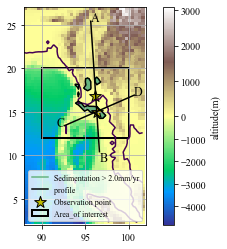

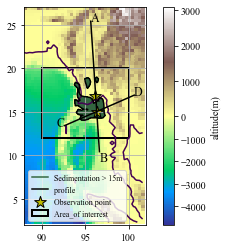

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import colors
divnorm=colors.TwoSlopeNorm(vcenter=0.)

lat=[2,27]
lon=[88,102]

lat_min=np.absolute(model.grid.lats-lat[0]).argmin()
lat_max=np.absolute(model.grid.lats-lat[1]).argmin()
if lat_min>lat_max :
    temps=lat_max
    lat_max=lat_min
    lat_min=temps
lon_min=np.absolute(model.grid.elons-lon[0]).argmin()
lon_max=np.absolute(model.grid.elons-lon[1]).argmin()
sed_cut=model.sed.sed[time_ind-1,:,:]-model.sed.sed[time_ind,:,:]
sed_cut=sed_cut[lat_min:lat_max,lon_min:lon_max]
topo=model.topo.topo_pres[lat_min:lat_max,lon_min:lon_max]
lati=model.grid.lats[lat_min:lat_max]
long=model.grid.elons[lon_min:lon_max]
fig_sed_act,ax=plt.subplots()
sp=ax.pcolor(long,lati,topo,cmap='terrain',norm=divnorm)
ax.contour(long,lati,topo,levels=[0])
ax.grid()
ax.plot([-1,-0.1],[-95,-94],label='Sedimentation > ' + str(sediment_ceil_derived*1000) + 'mm/yr',color=sediment_color)
ax.contourf(long,lati,sed_cut,levels=[sediment_ceil,90],colors=[sediment_color])
ax.contour(long,lati,sed_cut,levels=[sediment_ceil],colors='k')
ax.plot(T_1_lon,T_1_lat,label='profile',color='k')
ax.plot(T_2_lon,T_2_lat,color='k')
ax.scatter(lon_pt_1,lat_pt_1-90,s=150,marker='*',color='y',edgecolor='k',label='Observation point')
ax.scatter(lon_pt_2,lat_pt_2-90,s=150,marker='*',color='y',edgecolor='k')
plt.colorbar(sp,label='altitude(m)')
ax.set_aspect('equal',adjustable='box')
ax.axis([lon[0],lon[1],lat[0],lat[1]])
rect=patches.Rectangle((lon_map[0],lat_map[0]), 10,8, linewidth=2,edgecolor='k', facecolor='None',label='Area_of interrest',figure=fig_sed_act)
ax.add_patch(rect)
ax.legend(loc='lower left',prop={'size': 8})
plt.text(T_1_lon[0],T_1_lat[0],'A',fontsize='large')
plt.text(T_1_lon[1],T_1_lat[1],'B',fontsize='large',verticalalignment='top')
plt.text(T_2_lon[0],T_2_lat[0],'C',fontsize='large',horizontalalignment='right')
plt.text(T_2_lon[1],T_2_lat[1],'D',fontsize='large')
plt.show()

import matplotlib.pyplot as plt
lat_min=np.absolute(model.grid.lats-lat[0]).argmin()
lat_max=np.absolute(model.grid.lats-lat[1]).argmin()
if lat_min>lat_max :
    temps=lat_max
    lat_max=lat_min
    lat_min=temps
lon_min=np.absolute(model.grid.elons-lon[0]).argmin()
lon_max=np.absolute(model.grid.elons-lon[1]).argmin()
sed_cut=model.sed.sed[model.time_step_number-time_ind,lat_min:lat_max,lon_min:lon_max]
topo=model.topo.topo_pres[lat_min:lat_max,lon_min:lon_max]
lati=model.grid.lats[lat_min:lat_max]
long=model.grid.elons[lon_min:lon_max]
fig_sed_total,ax=plt.subplots()
sp=ax.pcolor(long,lati,topo,cmap='terrain',norm=divnorm)
ax.contour(long,lati,topo,levels=[0])
ax.grid()
ax.plot([-1,-0.1],[-95,-94],label='Sedimentation > ' + str(sediment_v_ceil) + 'm',color=sediment_color_dark)
ax.contourf(long,lati,sed_cut,levels=[sediment_v_ceil,90],colors=[sediment_color_dark])
ax.contour(long,lati,sed_cut,levels=[sediment_v_ceil],colors='k')
ax.plot(T_1_lon,T_1_lat,label='profile',color='k')
ax.plot(T_2_lon,T_2_lat,color='k')
ax.scatter(lon_pt_1,lat_pt_1-90,s=150,marker='*',color='y',edgecolor='k',label='Observation point')
ax.scatter(lon_pt_2,lat_pt_2-90,s=150,marker='*',color='y',edgecolor='k')
plt.colorbar(sp,label='altitude(m)')
ax.set_aspect('equal',adjustable='box')
ax.axis([lon[0],lon[1],lat[0],lat[1]])
plt.text(T_1_lon[0],T_1_lat[0],'A',fontsize='large')
plt.text(T_1_lon[1],T_1_lat[1],'B',fontsize='large',verticalalignment='top')
plt.text(T_2_lon[0],T_2_lat[0],'C',fontsize='large',horizontalalignment='right')
plt.text(T_2_lon[1],T_2_lat[1],'D',fontsize='large')
rect=patches.Rectangle((lon_map[0],lat_map[0]), 10,8, linewidth=2,edgecolor='k', facecolor='None',label='Area_of interrest',figure=fig_sed_total)
ax.add_patch(rect)

ax.legend(loc='lower left',prop={'size': 8})
plt.show()

In [ ]:
fig_sed_total.savefig(way+'map_trans_sed_total_'+ str(time_plot) +'.svg',format='svg')
fig_sed_act.savefig(way+'map_trans_sed_act_'+ str(time_plot) +'.svg',format='svg')

In [7]:
import numpy as np
from scipy import interpolate
import math
import gc


lat_trans_1=np.linspace(T_1_lat[0],T_1_lat[1],l)
lon_trans_1=np.linspace(T_1_lon[0],T_1_lon[1],l)

D_R_i=np.zeros((len(model_list),1024,1024*2))
D_R_o=np.zeros((len(model_list),1024,1024*2))
D_R_s=np.zeros((len(model_list),1024,1024*2))
D_R_o_s=np.zeros((len(model_list),1024,1024*2))
D_R_s_o=np.zeros((len(model_list),1024,1024*2))
D_G_i=np.zeros((len(model_list),1024,1024*2))
D_G_o=np.zeros((len(model_list),1024,1024*2))
D_G_s=np.zeros((len(model_list),1024,1024*2))
D_G_o_s=np.zeros((len(model_list),1024,1024*2))
D_G_s_o=np.zeros((len(model_list),1024,1024*2))
D_RSL=np.zeros((len(model_list),1024,1024*2))

D_lin_R_i_T1=np.zeros((len(model_list),l))
D_lin_R_o_T1=np.zeros((len(model_list),l))
D_lin_R_s_T1=np.zeros((len(model_list),l))
D_lin_R_o_s_T1=np.zeros((len(model_list),l))
D_lin_R_s_o_T1=np.zeros((len(model_list),l))
D_lin_G_i_T1=np.zeros((len(model_list),l))
D_lin_G_o_T1=np.zeros((len(model_list),l))
D_lin_G_s_T1=np.zeros((len(model_list),l))
D_lin_G_o_s_T1=np.zeros((len(model_list),l))
D_lin_G_s_o_T1=np.zeros((len(model_list),l))

print('creation down')
del(model)

for i in range(len(model_list)):
    gc.collect()
    model=load_model(model_list[i],love_way_list[i],out_2[i])
    model.init_resolution_plot(1024)
    print(i)
    D_R_i[i,:,:]=calc_diff(model.delR_e_i+model.delR_v_i,time_ind,model.time_step,model)
    D_R_o[i,:,:]=calc_diff(model.delR_e_o+model.delR_v_o,time_ind,model.time_step,model)
    D_R_s[i,:,:]=calc_diff(model.delR_e_s+model.delR_v_s,time_ind,model.time_step,model)
    D_R_o_s[i,:,:]=calc_diff(model.delR_e_o_s+model.delR_v_o_s,time_ind,model.time_step,model)
    D_R_s_o[i,:,:]=calc_diff(model.delR_e_s_o+model.delR_v_s_o,time_ind,model.time_step,model)
    D_G_i[i,:,:]=calc_diff(model.delG_e_i+model.delG_v_i,time_ind,model.time_step,model)
    D_G_o[i,:,:]=calc_diff(model.delG_e_o+model.delG_v_o,time_ind,model.time_step,model)
    D_G_s[i,:,:]=calc_diff(model.delG_e_s+model.delG_v_s,time_ind,model.time_step,model)
    D_G_o_s[i,:,:]=calc_diff(model.delG_e_o_s+model.delG_v_o_s,time_ind,model.time_step,model)
    D_G_s_o[i,:,:]=calc_diff(model.delG_e_s_o+model.delG_v_s_o,time_ind,model.time_step,model)
    D_RSL[i,:,:]=sphericalobject(model.delSL[time_ind-1,:]-model.delSL[-1,:],'coeff').coefftogrd_hd(model)

    D_lin_R_i_T1[i,:]=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_R_i[i,:,:].flatten(),(lon_trans_1,lat_trans_1),method='linear')
    D_lin_R_s_T1[i,:]=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_R_s[i,:,:].flatten(),(lon_trans_1,lat_trans_1),method='linear')
    D_lin_R_o_T1[i,:]=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_R_o[i,:,:].flatten(),(lon_trans_1,lat_trans_1),method='linear')
    D_lin_R_s_o_T1[i,:]=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_R_s_o[i,:,:].flatten(),(lon_trans_1,lat_trans_1),method='linear')
    D_lin_R_o_s_T1[i,:]=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_R_o_s[i,:,:].flatten(),(lon_trans_1,lat_trans_1),method='linear')
    D_lin_G_i_T1[i,:]=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_G_i[i,:,:].flatten(),(lon_trans_1,lat_trans_1),method='linear')
    D_lin_G_s_T1[i,:]=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_G_s[i,:,:].flatten(),(lon_trans_1,lat_trans_1),method='linear')
    D_lin_G_o_T1[i,:]=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_G_o[i,:,:].flatten(),(lon_trans_1,lat_trans_1),method='linear')
    D_lin_G_s_o_T1[i,:]=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_G_s_o[i,:,:].flatten(),(lon_trans_1,lat_trans_1),method='linear')
    D_lin_G_o_s_T1[i,:]=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_G_o_s[i,:,:].flatten(),(lon_trans_1,lat_trans_1),method='linear')
    del(model)

rad_lat_T1=math.pi*lat_trans_1/180
rad_lon_T1=math.pi*lon_trans_1/180
L_t_1=6371*np.arccos(np.cos(rad_lat_T1[0])*np.cos(rad_lat_T1)+np.sin(rad_lat_T1[0])*np.sin(rad_lat_T1)*np.cos(rad_lon_T1[0]-rad_lon_T1))
L_t_1[0]=0

creation down
model_created
preload
next
end
0
model_created
preload
next
end
1
model_created
preload
next
end
2
model_created
preload
next
end
3
model_created
preload
next
end
4
model_created
preload
next
end
5
model_created
preload
next
end
6
model_created
preload
next
end
7
model_created
preload
next
end
8
model_created
preload
next
end
9


In [ ]:
import numpy as np
from scipy import interpolate
import math
import gc


lat_trans_1=np.linspace(T_1_lat[0],T_1_lat[1],l)
lon_trans_1=np.linspace(T_1_lon[0],T_1_lon[1],l)


D_R_i_pt1=np.zeros((len(model_list),time_step))
D_R_o_pt1=np.zeros((len(model_list),time_step))
D_R_s_pt1=np.zeros((len(model_list),time_step))
D_R_o_s_pt1=np.zeros((len(model_list),time_step))
D_R_s_o_pt1=np.zeros((len(model_list),time_step))
D_G_i_pt1=np.zeros((len(model_list),time_step))
D_G_o_pt1=np.zeros((len(model_list),time_step))
D_G_s_pt1=np.zeros((len(model_list),time_step))
D_G_o_s_pt1=np.zeros((len(model_list),time_step))
D_G_s_o_pt1=np.zeros((len(model_list),time_step))
D_RSL_pt1=np.zeros((len(model_list),time_step))

D_R_i_pt2=np.zeros((len(model_list),time_step))
D_R_o_pt2=np.zeros((len(model_list),time_step))
D_R_s_pt2=np.zeros((len(model_list),time_step))
D_R_o_s_pt2=np.zeros((len(model_list),time_step))
D_R_s_o_pt2=np.zeros((len(model_list),time_step))
D_G_i_pt2=np.zeros((len(model_list),time_step))
D_G_o_pt2=np.zeros((len(model_list),time_step))
D_G_s_pt2=np.zeros((len(model_list),time_step))
D_G_o_s_pt2=np.zeros((len(model_list),time_step))
D_G_s_o_pt2=np.zeros((len(model_list),time_step))
D_RSL_pt2=np.zeros((len(model_list),time_step))

print('creation down')
del(model)

from spharm import calc_at_point

for i in range(len(model_list)):
    gc.collect()
    model=load_model(model_list[i],love_way_list[i],out_2[i])
    model.init_resolution_plot(1024)
    print(i)
    for t_it in range(model.time_step_number):
        D_R_i_pt1[i,t_it]=np.real(calc_at_point(model.delR_e_i[t_it,:]+model.delR_v_i[t_it,:],model,lat_pt_1,lon_pt_1))
        D_R_o_pt1[i,t_it]=np.real(calc_at_point(model.delR_e_o[t_it,:]+model.delR_v_o[t_it,:],model,lat_pt_1,lon_pt_1))
        D_R_s_pt1[i,t_it]=np.real(calc_at_point(model.delR_e_s[t_it,:]+model.delR_v_s[t_it,:],model,lat_pt_1,lon_pt_1))
        D_R_o_s_pt1[i,t_it]=np.real(calc_at_point(model.delR_e_o_s[t_it,:]+model.delR_v_o_s[t_it,:],model,lat_pt_1,lon_pt_1))
        D_R_s_o_pt1[i,t_it]=np.real(calc_at_point(model.delR_e_s_o[t_it,:]+model.delR_v_s_o[t_it,:],model,lat_pt_1,lon_pt_1))
        D_G_i_pt1[i,t_it]=np.real(calc_at_point(model.delG_e_i[t_it,:]+model.delG_v_i[t_it,:],model,lat_pt_1,lon_pt_1))
        D_G_o_pt1[i,t_it]=np.real(calc_at_point(model.delG_e_o[t_it,:]+model.delG_v_o[t_it,:],model,lat_pt_1,lon_pt_1))
        D_G_s_pt1[i,t_it]=np.real(calc_at_point(model.delG_e_s[t_it,:]+model.delG_v_s[t_it,:],model,lat_pt_1,lon_pt_1))
        D_G_o_s_pt1[i,t_it]=np.real(calc_at_point(model.delG_e_o_s[t_it,:]+model.delG_v_o_s[t_it,:],model,lat_pt_1,lon_pt_1))
        D_G_s_o_pt1[i,t_it]=np.real(calc_at_point(model.delG_e_s_o[t_it,:]+model.delG_v_s_o[t_it,:],model,lat_pt_1,lon_pt_1))
        D_RSL_pt1[i,t_it]=np.real(calc_at_point(model.delSL[t_it,:],model,lat_pt_1,lon_pt_1))

        D_R_i_pt2[i,t_it]=np.real(calc_at_point(model.delR_e_i[t_it,:]+model.delR_v_i[t_it,:],model,lat_pt_2,lon_pt_2))
        D_R_o_pt2[i,t_it]=np.real(calc_at_point(model.delR_e_o[t_it,:]+model.delR_v_o[t_it,:],model,lat_pt_2,lon_pt_2))
        D_R_s_pt2[i,t_it]=np.real(calc_at_point(model.delR_e_s[t_it,:]+model.delR_v_s[t_it,:],model,lat_pt_2,lon_pt_2))
        D_R_o_s_pt2[i,t_it]=np.real(calc_at_point(model.delR_e_o_s[t_it,:]+model.delR_v_o_s[t_it,:],model,lat_pt_2,lon_pt_2))
        D_R_s_o_pt2[i,t_it]=np.real(calc_at_point(model.delR_e_s_o[t_it,:]+model.delR_v_s_o[t_it,:],model,lat_pt_2,lon_pt_2))
        D_G_i_pt2[i,t_it]=np.real(calc_at_point(model.delG_e_i[t_it,:]+model.delG_v_i[t_it,:],model,lat_pt_2,lon_pt_2))
        D_G_o_pt2[i,t_it]=np.real(calc_at_point(model.delG_e_o[t_it,:]+model.delG_v_o[t_it,:],model,lat_pt_2,lon_pt_2))
        D_G_s_pt2[i,t_it]=np.real(calc_at_point(model.delG_e_s[t_it,:]+model.delG_v_s[t_it,:],model,lat_pt_2,lon_pt_2))
        D_G_o_s_pt2[i,t_it]=np.real(calc_at_point(model.delG_e_o_s[t_it,:]+model.delG_v_o_s[t_it,:],model,lat_pt_2,lon_pt_2))
        D_G_s_o_pt2[i,t_it]=np.real(calc_at_point(model.delG_e_s_o[t_it,:]+model.delG_v_s_o[t_it,:],model,lat_pt_2,lon_pt_2))
        D_RSL_pt2[i,t_it]=np.real(calc_at_point(model.delSL[t_it,:],model,lat_pt_2,lon_pt_2))

    

rad_lat_T1=math.pi*lat_trans_1/180
rad_lon_T1=math.pi*lon_trans_1/180
L_t_1=6371*np.arccos(np.cos(rad_lat_T1[0])*np.cos(rad_lat_T1)+np.sin(rad_lat_T1[0])*np.sin(rad_lat_T1)*np.cos(rad_lon_T1[0]-rad_lon_T1))
L_t_1[0]=0

In [11]:
i=2
#del(model)
model=load_model(model_list[i],love_way_list[i],out_2[i])

model_created
preload
next
end


In [12]:
i_lon=np.abs(np.tile(model.grid.elons,(len(lon_trans_1),1))-np.tile(lon_trans_1,(len(model.grid.elons),1)).transpose()).argmin(axis=1)
i_lat=np.abs(np.tile(model.grid.lats,(len(lat_trans_1),1))-np.tile(lat_trans_1,(len(model.grid.lats),1)).transpose()).argmin(axis=1)
i_pt_1_T1=np.abs(lat_trans_1-(lat_pt_1-90)).argmin()
i_shore=np.abs(model.topo.topo_pres[i_lat,i_lon]).argmin()

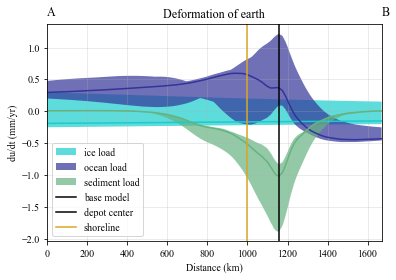

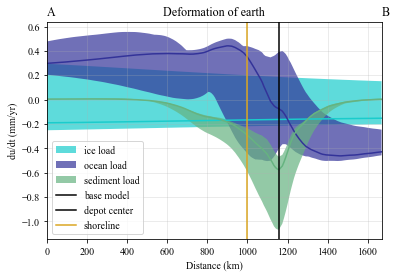

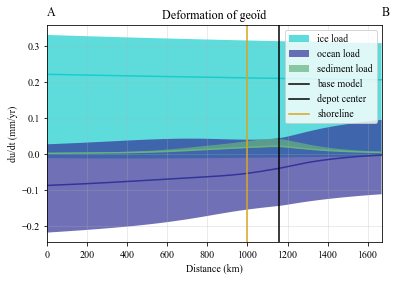

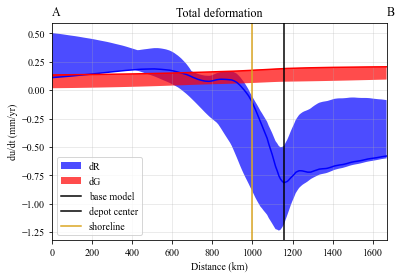

In [16]:
import matplotlib.colors as mcolors

fig_R_T1,ax_R_T1=plt.subplots()
ax_R_T1.fill_between(L_t_1,-D_lin_R_i_T1.min(0)*1000,-D_lin_R_i_T1.max(0)*1000,alpha=0.7,color=ice_color,label='ice load',edgecolor='none')
ax_R_T1.plot(L_t_1,-D_lin_R_i_T1[0,:]*1000,color=ice_color)
ax_R_T1.fill_between(L_t_1,-D_lin_R_o_T1.min(0)*1000,-D_lin_R_o_T1.max(0)*1000,alpha=0.7,color=ocean_color,label='ocean load',edgecolor='none')
ax_R_T1.plot(L_t_1,-D_lin_R_o_T1[0,:]*1000,color=ocean_color)
ax_R_T1.fill_between(L_t_1,-D_lin_R_s_T1.min(0)*1000,-D_lin_R_s_T1.max(0)*1000,alpha=0.7,color=sediment_color,label='sediment load',edgecolor='none')
ax_R_T1.plot(L_t_1,-D_lin_R_s_T1[0,:]*1000,color=sediment_color)
ax_R_T1.plot([0,-1],[0,0],label='base model',color='k')
y_limit=ax_R_T1.get_ylim()
ax_R_T1.plot([L_t_1[i_pt_1_T1],L_t_1[i_pt_1_T1]],ax_R_T1.get_ylim(),color='k',label='depot center')
ax_R_T1.plot([L_t_1[i_shore],L_t_1[i_shore]],ax_R_T1.get_ylim(),color=mcolors.CSS4_COLORS["goldenrod"],label='shoreline')
plt.ylim(y_limit)
l=ax_R_T1.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_R_T1.annotate('A', (0,max(ax_R_T1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_R_T1.annotate('B', (L_t_1[-1],max(ax_R_T1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.title('Deformation of earth')
plt.ylabel('du/dt (mm/yr)')
plt.xlabel('Distance (km)')
plt.grid(alpha=0.3)
plt.xlim(L_t_1.min(),L_t_1.max())
plt.legend()
plt.show()

#Earth deformation compensated
fig_R_T1_compensated,ax_R_T1_compensated=plt.subplots()
ax_R_T1_compensated.fill_between(L_t_1,-D_lin_R_i_T1.min(0)*1000,-D_lin_R_i_T1.max(0)*1000,alpha=0.7,color=ice_color,label='ice load',edgecolor='none')
ax_R_T1_compensated.plot(L_t_1,-D_lin_R_i_T1[0,:]*1000,color=ice_color)
ax_R_T1_compensated.fill_between(L_t_1,-D_lin_R_o_s_T1.min(0)*1000,-D_lin_R_o_s_T1.max(0)*1000,alpha=0.7,color=ocean_color,label='ocean load',edgecolor='none')
ax_R_T1_compensated.plot(L_t_1,-D_lin_R_o_s_T1[0,:]*1000,color=ocean_color)
ax_R_T1_compensated.fill_between(L_t_1,-D_lin_R_s_o_T1.min(0)*1000,-D_lin_R_s_o_T1.max(0)*1000,alpha=0.7,color=sediment_color,label='sediment load',edgecolor='none')
ax_R_T1_compensated.plot(L_t_1,-D_lin_R_s_o_T1[0,:]*1000,color=sediment_color)
ax_R_T1_compensated.plot([0,-1],[0,0],label='base model',color='k')
y_limit=ax_R_T1_compensated.get_ylim()
ax_R_T1_compensated.plot([L_t_1[i_pt_1_T1],L_t_1[i_pt_1_T1]],ax_R_T1_compensated.get_ylim(),color='k',label='depot center')
ax_R_T1_compensated.plot([L_t_1[i_shore],L_t_1[i_shore]],ax_R_T1_compensated.get_ylim(),color=mcolors.CSS4_COLORS["goldenrod"],label='shoreline')
plt.ylim(y_limit)
l=ax_R_T1_compensated.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_R_T1_compensated.annotate('A', (0,max(ax_R_T1_compensated.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_R_T1_compensated.annotate('B', (L_t_1[-1],max(ax_R_T1_compensated.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.title('Deformation of earth')
plt.ylabel('du/dt (mm/yr)')
plt.xlabel('Distance (km)')
plt.grid(alpha=0.3)
plt.xlim(L_t_1.min(),L_t_1.max())
plt.legend()
plt.show()

#Geoïd deformation
fig_G_T1,ax_G_T1=plt.subplots()
ax_G_T1.fill_between(L_t_1,D_lin_G_i_T1.min(0)*1000,D_lin_G_i_T1.max(0)*1000,alpha=0.7,color=ice_color,label='ice load',edgecolor='none')
ax_G_T1.plot(L_t_1,D_lin_G_i_T1[0,:]*1000,color=ice_color)
ax_G_T1.fill_between(L_t_1,D_lin_G_o_T1.min(0)*1000,D_lin_G_o_T1.max(0)*1000,alpha=0.7,color=ocean_color,label='ocean load',edgecolor='none')
ax_G_T1.plot(L_t_1,D_lin_G_o_T1[0,:]*1000,color=ocean_color)
ax_G_T1.fill_between(L_t_1,D_lin_G_s_T1.min(0)*1000,D_lin_G_s_T1.max(0)*1000,alpha=0.7,color=sediment_color,label='sediment load',edgecolor='none')
ax_G_T1.plot(L_t_1,D_lin_G_s_T1[0,:]*1000,color=sediment_color)
ax_G_T1.plot([0,-1],[0,0],label='base model',color='k')
y_limit=ax_G_T1.get_ylim()
ax_G_T1.plot([L_t_1[i_pt_1_T1],L_t_1[i_pt_1_T1]],ax_G_T1.get_ylim(),color='k',label='depot center')
ax_G_T1.plot([L_t_1[i_shore],L_t_1[i_shore]],ax_G_T1.get_ylim(),color=mcolors.CSS4_COLORS["goldenrod"],label='shoreline')
plt.ylim(y_limit)
l=ax_G_T1.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_G_T1.annotate('A', (0,max(ax_G_T1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_G_T1.annotate('B', (L_t_1[-1],max(ax_G_T1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.title('Deformation of geoïd')
plt.ylabel('du/dt (mm/yr)')
plt.xlabel('Distance (km)')
plt.grid(alpha=0.3)
plt.xlim(L_t_1.min(),L_t_1.max())
plt.legend()
plt.show()

#TOtal deformation geoïd and Earth
fig_tot_T1,ax_tot=plt.subplots()
ax_tot.fill_between(L_t_1,(-D_lin_R_i_T1*1000-D_lin_R_s_T1*1000-D_lin_R_o_T1*1000).min(0),(-D_lin_R_i_T1*1000-D_lin_R_s_T1*1000-D_lin_R_o_T1*1000).max(0),alpha=0.7,color='b',label='dR',edgecolor='none')
ax_tot.plot(L_t_1,-D_lin_R_i_T1[0,:]*1000-D_lin_R_o_T1[0,:]*1000-D_lin_R_s_T1[0,:]*1000,color='b')
ax_tot.fill_between(L_t_1,(D_lin_G_i_T1*1000+D_lin_G_s_T1*1000+D_lin_G_o_T1*1000).min(0),(D_lin_G_i_T1*1000+D_lin_G_s_T1*1000+D_lin_G_o_T1*1000).max(0),alpha=0.7,color='r',label='dG',edgecolor='none')
ax_tot.plot(L_t_1,D_lin_G_i_T1[0,:]*1000+D_lin_G_o_T1[0,:]*1000+D_lin_G_s_T1[0,:]*1000,color='r')
ax_tot.plot([0,-1],[0,0],label='base model',color='k')
y_limit=ax_tot.get_ylim()
ax_tot.plot([L_t_1[i_pt_1_T1],L_t_1[i_pt_1_T1]],ax_tot.get_ylim(),color='k',label='depot center')
ax_tot.plot([L_t_1[i_shore],L_t_1[i_shore]],ax_tot.get_ylim(),color=mcolors.CSS4_COLORS["goldenrod"],label='shoreline')
plt.ylim(y_limit)
l=ax_tot.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot.annotate('A', (0,max(ax_tot.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot.annotate('B', (L_t_1[-1],max(ax_tot.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.title('Total deformation')
plt.ylabel('du/dt (mm/yr)')
plt.xlabel('Distance (km)')
plt.grid(alpha=0.3)
plt.xlim(L_t_1.min(),L_t_1.max())
plt.legend()
plt.show()

In [17]:
way='C:/Users/ahenry01/Desktop/Python_code/figure_output/total_comparison/'
fig_R_T1.savefig(way+'R_T1.svg',format='svg')
fig_R_T1_compensated.savefig(way+'R_T1_compensated.svg',format='svg')
fig_G_T1.savefig(way+'G_T1.svg',format='svg')
fig_tot_T1.savefig(way+'totale_T1.svg',format='svg')

In [ ]:
d_time=time_list[:-1]-time_list[1:]

d_R_i_pt1=np.concatenate((np.zeros((len(model_name),1)),D_R_i_pt1[:,:-1]-D_R_i_pt1[:,1:]),axis=1)
d_R_o_pt1=np.concatenate((np.zeros((len(model_name),1)),D_R_o_pt1[:,:-1]-D_R_o_pt1[:,1:]),axis=1)
d_R_s_pt1=np.concatenate((np.zeros((len(model_name),1)),D_R_s_pt1[:,:-1]-D_R_s_pt1[:,1:]),axis=1)
d_R_o_s_pt1=np.concatenate((np.zeros((len(model_name),1)),D_R_o_s_pt1[:,:-1]-D_R_o_s_pt1[:,1:]),axis=1)
d_R_s_o_pt1=np.concatenate((np.zeros((len(model_name),1)),D_R_s_o_pt1[:,:-1]-D_R_s_o_pt1[:,1:]),axis=1)
d_G_i_pt1=np.concatenate((np.zeros((len(model_name),1)),D_G_i_pt1[:,:-1]-D_G_i_pt1[:,1:]),axis=1)
d_G_o_pt1=np.concatenate((np.zeros((len(model_name),1)),D_G_o_pt1[:,:-1]-D_G_o_pt1[:,1:]),axis=1)
d_G_s_pt1=np.concatenate((np.zeros((len(model_name),1)),D_G_s_pt1[:,:-1]-D_G_s_pt1[:,1:]),axis=1)
d_G_o_s_pt1=np.concatenate((np.zeros((len(model_name),1)),D_G_o_s_pt1[:,:-1]-D_G_o_s_pt1[:,1:]),axis=1)
d_G_s_o_pt1=np.concatenate((np.zeros((len(model_name),1)),D_G_s_o_pt1[:,:-1]-D_G_s_o_pt1[:,1:]),axis=1)

d_RSL_pt1=np.concatenate((np.zeros((len(model_name),1)),D_RSL_pt1[:,:-1]-D_RSL_pt1[:,1:]),axis=1)

d_R_i_pt2=np.concatenate((np.zeros((len(model_name),1)),D_R_i_pt2[:,:-1]-D_R_i_pt2[:,1:]),axis=1)
d_R_o_pt2=np.concatenate((np.zeros((len(model_name),1)),D_R_o_pt2[:,:-1]-D_R_o_pt2[:,1:]),axis=1)
d_R_s_pt2=np.concatenate((np.zeros((len(model_name),1)),D_R_s_pt2[:,:-1]-D_R_s_pt2[:,1:]),axis=1)
d_R_o_s_pt2=np.concatenate((np.zeros((len(model_name),1)),D_R_o_s_pt2[:,:-1]-D_R_o_s_pt2[:,1:]),axis=1)
d_R_s_o_pt2=np.concatenate((np.zeros((len(model_name),1)),D_R_s_o_pt2[:,:-1]-D_R_s_o_pt2[:,1:]),axis=1)
d_RSL_pt2=np.concatenate((np.zeros((len(model_name),1)),D_RSL_pt2[:,:-1]-D_RSL_pt2[:,1:]),axis=1)
d_G_i_pt2=np.concatenate((np.zeros((len(model_name),1)),D_G_i_pt2[:,:-1]-D_G_i_pt2[:,1:]),axis=1)
d_G_o_pt2=np.concatenate((np.zeros((len(model_name),1)),D_G_o_pt2[:,:-1]-D_G_o_pt2[:,1:]),axis=1)
d_G_s_pt2=np.concatenate((np.zeros((len(model_name),1)),D_G_s_pt2[:,:-1]-D_G_s_pt2[:,1:]),axis=1)
d_G_o_s_pt2=np.concatenate((np.zeros((len(model_name),1)),D_G_o_s_pt2[:,:-1]-D_G_o_s_pt2[:,1:]),axis=1)
d_G_s_o_pt2=np.concatenate((np.zeros((len(model_name),1)),D_G_s_o_pt2[:,:-1]-D_G_s_o_pt2[:,1:]),axis=1)

In [18]:
import pandas
m_pt1=np.concatenate((D_R_i_pt1,D_R_o_pt1,D_R_s_pt1,D_R_o_s_pt1,D_R_s_o_pt1,D_G_i_pt1,D_G_o_pt1,D_G_s_pt1,D_G_o_s_pt1,D_G_s_o_pt1,D_RSL_pt1,d_R_i_pt1,d_R_o_pt1,d_R_s_pt1,d_R_o_s_pt1,d_R_s_o_pt1,d_G_i_pt1,d_G_o_pt1,d_G_s_pt1,d_G_o_s_pt1,d_G_s_o_pt1,d_RSL_pt1)).transpose()
m_pt2=np.concatenate((D_R_i_pt2,D_R_o_pt2,D_R_s_pt2,D_R_o_s_pt2,D_R_s_o_pt2,D_G_i_pt2,D_G_o_pt2,D_G_s_pt2,D_G_o_s_pt2,D_G_s_o_pt2,D_RSL_pt2,d_R_i_pt2,d_R_o_pt2,d_R_s_pt2,d_R_o_s_pt2,d_R_s_o_pt2,d_G_i_pt2,d_G_o_pt2,d_G_s_pt2,d_G_o_s_pt2,d_G_s_o_pt2,d_RSL_pt2)).transpose()
mux=pandas.MultiIndex.from_product([['D_R_i','D_R_o','D_R_s','D_R_o_s','D_R_s_o','D_G_i','D_G_o','D_G_s','D_G_o_s','D_G_s_o','D_RSL','d_R_i','d_R_o','d_R_s','d_R_o_s','d_R_s_o','d_G_i','d_G_o','d_G_s','d_G_o_s','d_G_s_o','d_RSL'], model_name])
table_pt1=pandas.DataFrame(m_pt1,columns=mux,index=time_list[:-1].astype(str))
table_pt2=pandas.DataFrame(m_pt2,columns=mux,index=time_list[:-1].astype(str))

NameError: name 'D_R_i_pt1' is not defined

In [ ]:
way='C:/Users/ahenry01/Desktop/Python_code/figure_output/total_comparison/'
table_pt1.to_csv(way+'time_R_G_RSL_pt1' + '.csv')
table_pt2.to_csv(way+'time_R_G_RSL_pt2' + '.csv')

In [ ]:
RSL_color='k'
way='C:/Users/ahenry01/Desktop/Python_code/figure_output/total_comparison/'
fig,ax=plt.subplots()
plt.fill_between(time_list[2:],(-d_R_i_pt1[:,1:]/d_time[1:]).min(axis=0),(-d_R_i_pt1[:,1:]/d_time[1:]).max(axis=0),alpha=0.7,color=ice_color,label='ice load',edgecolor='none')
plt.plot(time_list[2:],(-d_R_i_pt1[0,1:]/d_time[1:]),color=ice_color)
plt.fill_between(time_list[2:],(-d_R_o_pt1[:,1:]/d_time[1:]).min(axis=0),(-d_R_o_pt1[:,1:]/d_time[1:]).max(axis=0),alpha=0.7,color=ocean_color,label='ocean load',edgecolor='none')
plt.plot(time_list[2:],(-d_R_o_pt1[0,1:]/d_time[1:]),color=ocean_color)
plt.fill_between(time_list[2:],(-d_R_s_pt1[:,1:]/d_time[1:]).min(axis=0),(-d_R_s_pt1[:,1:]/d_time[1:]).max(axis=0),alpha=0.7,color=sediment_color,label='sediment load',edgecolor='none')
plt.plot(time_list[2:],(-d_R_s_pt1[0,1:]/d_time[1:]),color=sediment_color)
plt.grid(alpha=0.3)
plt.ylim([-2,(-d_R_o_pt1[:,1:]/d_time[1:]).max()])
plt.ylabel('Deformation rate (mm/yr)')
plt.xlabel('Time (kyr)')
plt.legend()
plt.show()
fig.savefig(way+'dR_time.svg')

fig,ax=plt.subplots()
plt.fill_between(time_list[2:],(d_G_i_pt1[:,1:]/d_time[1:]).min(axis=0),(d_G_i_pt1[:,1:]/d_time[1:]).max(axis=0),alpha=0.7,color=ice_color,label='ice load',edgecolor='none')
plt.plot(time_list[2:],(d_G_i_pt1[0,1:]/d_time[1:]),color=ice_color)
plt.fill_between(time_list[2:],(d_G_o_pt1[:,1:]/d_time[1:]).min(axis=0),(d_G_o_pt1[:,1:]/d_time[1:]).max(axis=0),alpha=0.7,color=ocean_color,label='ocean load',edgecolor='none')
plt.plot(time_list[2:],(d_G_o_pt1[0,1:]/d_time[1:]),color=ocean_color)
plt.fill_between(time_list[2:],(d_G_s_pt1[:,1:]/d_time[1:]).min(axis=0),(d_G_s_pt1[:,1:]/d_time[1:]).max(axis=0),alpha=0.7,color=sediment_color,label='sediment load',edgecolor='none')
plt.plot(time_list[2:],(d_G_s_pt1[0,1:]/d_time[1:]),color=sediment_color)
plt.grid(alpha=0.3)
plt.ylim([(d_G_o_pt1[:,1:]/d_time[1:]).min(),1.25])
plt.ylabel('Deformation rate (mm/yr)')
plt.xlabel('Time (kyr)')
plt.legend()
plt.show()
fig.savefig(way+'dG_time.svg')

fig,ax=plt.subplots()
plt.fill_between(time_list[2:],(-d_RSL_pt1[:,1:]/d_time[1:]).min(axis=0),(-d_RSL_pt1[:,1:]/d_time[1:]).max(axis=0),alpha=0.7,color=RSL_color,label='ice load',edgecolor='none')
plt.plot(time_list[2:],(-d_RSL_pt1[0,1:]/d_time[1:]),color=RSL_color)
plt.grid(alpha=0.3)
plt.ylabel('RSL rate (mm/yr)')
plt.xlabel('Time (kyr)')
plt.xlim([0,None])
plt.show()
fig.savefig(way+'delRSL_time.svg')

fig,ax=plt.subplots()
plt.fill_between(time_list[3:],(D_RSL_pt1[:,1:-1]-np.tile(D_RSL_pt1[:,-1],(len(time_list[3:]),1)).transpose()).min(axis=0)/2,(D_RSL_pt1[:,1:-1]-np.tile(D_RSL_pt1[:,-1],(len(time_list[3:]),1)).transpose()).max(axis=0)/2,alpha=0.7,color=RSL_color,label='RSL',edgecolor='none')
plt.plot(time_list[3:],(D_RSL_pt1[0,1:-1]-D_RSL_pt1[0,-1])/2,color=RSL_color)
plt.plot(time_list[3:],model.ESL[2:],color='k',linestyle='dashed',label='ESL')
plt.grid(alpha=0.3)
plt.ylabel('RSL (m)')
plt.xlabel('Time (kyr)')
plt.legend()
plt.xlim([0,None])
plt.show()
fig.savefig(way+'DRSL_time.svg')

i=np.where(time_list==8)[0][0]
fig,ax=plt.subplots()
plt.fill_between(time_list[i+1:],(D_RSL_pt1[:,i-1:-1]-np.tile(D_RSL_pt1[:,-1],(len(time_list[i+1:]),1)).transpose()).min(axis=0)/2,(D_RSL_pt1[:,i-1:-1]-np.tile(D_RSL_pt1[:,-1],(len(time_list[i+1:]),1)).transpose()).max(axis=0)/2,alpha=0.7,color=RSL_color,label='RSL',edgecolor='none')
plt.plot(time_list[i+1:],(D_RSL_pt1[0,i-1:-1]-D_RSL_pt1[0,-1])/2,color=RSL_color)
plt.plot(time_list[i+1:],model.ESL[i:],color='k',linestyle='dashed',label='ESL')
plt.grid(alpha=0.3)
plt.ylabel('RSL rate (mm/yr)')
plt.xlabel('Time (kyr)')
plt.legend()
plt.xlim([0,None])
plt.show()
fig.savefig(way+'DRSL_time_zoom.svg')

fig,ax=plt.subplots()
plt.fill_between(time_list[i:],(-d_RSL_pt1[:,i-1:]/d_time[i-1:]).min(axis=0),(-d_RSL_pt1[:,i-1:]/d_time[i-1:]).max(axis=0),alpha=0.7,color=RSL_color,label='ice load',edgecolor='none')
plt.plot(time_list[i:],(-d_RSL_pt1[0,i-1:]/d_time[i-1:]),color=RSL_color)
plt.grid(alpha=0.3)
plt.ylabel('RSL (m)')
plt.xlim([0,None])
plt.xlabel('Time (kyr)')
plt.show()
fig.savefig(way+'delRSL_time_zoom.svg')

In [ ]:
model.init_resolution_plot(1024)

In [33]:
lat_map_min=np.absolute(model.grid.lats-lat_map[0]).argmin()
lat_map_max=np.absolute(model.grid.lats-lat_map[1]).argmin()
if lat_map_min>lat_map_max :
    temps=lat_map_max
    lat_map_max=lat_map_min
    lat_map_min=temps
lon_map_min=np.absolute(model.grid.elons-lon_map[0]).argmin()
lon_map_max=np.absolute(model.grid.elons-lon_map[1]).argmin()
lati_sed=model.grid.lats[lat_map_min:lat_map_max]
long_sed=model.grid.elons[lon_map_min:lon_map_max]
sed_cut=-model.sed.sed[time_ind,lat_map_min:lat_map_max,lon_map_min:lon_map_max]+model.sed.sed[time_ind-1,lat_map_min:lat_map_max,lon_map_min:lon_map_max]
sed_v_cut=model.sed.sed[model.time_step_number-time_ind,lat_map_min:lat_map_max,lon_map_min:lon_map_max]
topo=model.topo.topo_pres[lat_map_min:lat_map_max,lon_map_min:lon_map_max]

lat_min=np.absolute(model.lats_res-lat_map[0]).argmin()
lat_max=np.absolute(model.lats_res-lat_map[1]).argmin()
if lat_min>lat_max :
    temps=lat_max
    lat_max=lat_min
    lat_min=temps
lon_min=np.absolute(model.elons_res-lon_map[0]).argmin()
lon_max=np.absolute(model.elons_res-lon_map[1]).argmin()
D_RSL_cut=D_RSL[:,lat_min:lat_max,lon_min:lon_max]
D_R=(D_R_i+D_R_o+D_R_s)*1000
D_R_cut=D_R[:,lat_min:lat_max,lon_min:lon_max]
D_G=(D_G_i+D_G_o+D_G_s)*1000
D_G_cut=D_G[:,lat_min:lat_max,lon_min:lon_max]
lati=model.lats_res[lat_min:lat_max]
long=model.elons_res[lon_min:lon_max]


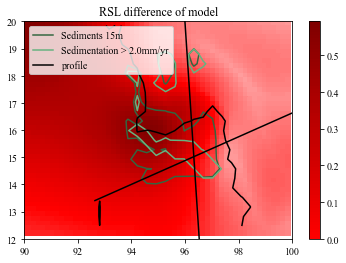

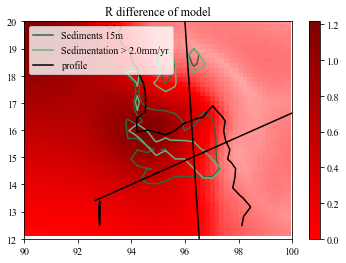

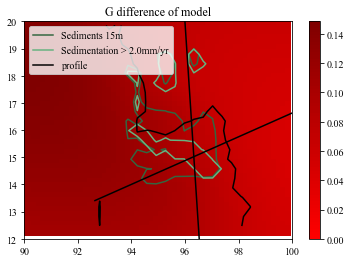

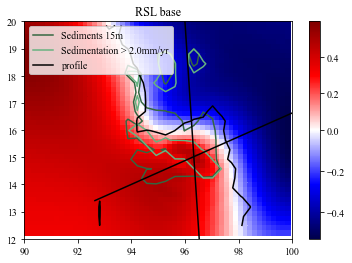

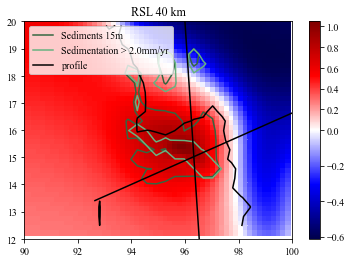

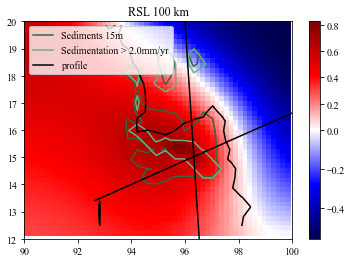

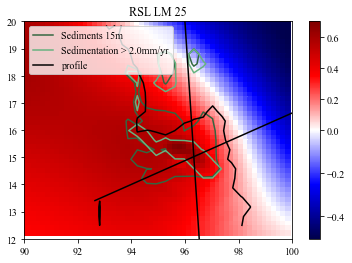

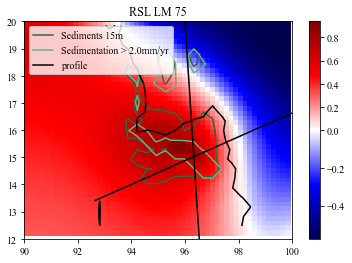

In [49]:
from matplotlib import colors
way='C:/Users/ahenry01/Desktop/Python_code/figure_output/total_comparison/'
fig_RSL_diff,ax_RSL=plt.subplots()
divnorm=colors.TwoSlopeNorm(vcenter=0)
s=ax_RSL.pcolor(long,lati,D_RSL_cut.max(0)-D_RSL_cut.min(0),cmap='seismic',norm=divnorm)
ax_RSL.contour(long_sed,lati_sed,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_RSL.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_RSL.contour(long_sed,lati_sed,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_RSL.contour(long_sed,lati_sed,topo,levels=[0],colors='k')
ax_RSL.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_RSL.plot(T_1_lon,T_1_lat,label='profile',color='k')
ax_RSL.plot(T_2_lon,T_2_lat,color='k')
ax_RSL.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
plt.colorbar(s)
plt.title('RSL difference of model')
ax_RSL.legend()
plt.show()

fig_RSL_diff.savefig(way+'map_RSL_diff.svg',format='svg')

from matplotlib import colors
fig_RSL_diff,ax_RSL=plt.subplots()
divnorm=colors.TwoSlopeNorm(vcenter=0)
s=ax_RSL.pcolor(long,lati,D_R_cut.max(0)-D_R_cut.min(0),cmap='seismic',norm=divnorm)
ax_RSL.contour(long_sed,lati_sed,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_RSL.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_RSL.contour(long_sed,lati_sed,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_RSL.contour(long_sed,lati_sed,topo,levels=[0],colors='k')
ax_RSL.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_RSL.plot(T_1_lon,T_1_lat,label='profile',color='k')
ax_RSL.plot(T_2_lon,T_2_lat,color='k')
ax_RSL.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
plt.colorbar(s)
plt.title('R difference of model')
ax_RSL.legend()
plt.show()

fig_RSL_diff.savefig(way+'map_R_diff.svg',format='svg')

from matplotlib import colors
fig_RSL_diff,ax_RSL=plt.subplots()
divnorm=colors.TwoSlopeNorm(vcenter=0)
s=ax_RSL.pcolor(long,lati,D_G_cut.max(0)-D_G_cut.min(0),cmap='seismic',norm=divnorm)
ax_RSL.contour(long_sed,lati_sed,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_RSL.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_RSL.contour(long_sed,lati_sed,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_RSL.contour(long_sed,lati_sed,topo,levels=[0],colors='k')
ax_RSL.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_RSL.plot(T_1_lon,T_1_lat,label='profile',color='k')
ax_RSL.plot(T_2_lon,T_2_lat,color='k')
ax_RSL.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
plt.colorbar(s)
plt.title('G difference of model')
ax_RSL.legend()
plt.show()

fig_RSL_diff.savefig(way+'map_G_diff.svg',format='svg')

from matplotlib import colors
fig_RSL_diff,ax_RSL=plt.subplots()
divnorm=colors.TwoSlopeNorm(vcenter=0)
s=ax_RSL.pcolor(long,lati,-D_RSL_cut[0,:,:]*2,cmap='seismic',norm=divnorm)
ax_RSL.contour(long_sed,lati_sed,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_RSL.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_RSL.contour(long_sed,lati_sed,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_RSL.contour(long_sed,lati_sed,topo,levels=[0],colors='k')
ax_RSL.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_RSL.plot(T_1_lon,T_1_lat,label='profile',color='k')
ax_RSL.plot(T_2_lon,T_2_lat,color='k')
ax_RSL.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
plt.colorbar(s)
plt.title('RSL base')
ax_RSL.legend()
plt.show()

fig_RSL_diff.savefig(way+'map_RSL_base.svg',format='svg')

from matplotlib import colors
fig_RSL_diff,ax_RSL=plt.subplots()
divnorm=colors.TwoSlopeNorm(vcenter=0)
s=ax_RSL.pcolor(long,lati,-D_RSL_cut[1,:,:]*2,cmap='seismic',norm=divnorm)
ax_RSL.contour(long_sed,lati_sed,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_RSL.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_RSL.contour(long_sed,lati_sed,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_RSL.contour(long_sed,lati_sed,topo,levels=[0],colors='k')
ax_RSL.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_RSL.plot(T_1_lon,T_1_lat,label='profile',color='k')
ax_RSL.plot(T_2_lon,T_2_lat,color='k')
ax_RSL.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
plt.colorbar(s)
plt.title('RSL 40 km')
ax_RSL.legend()
plt.show()

fig_RSL_diff.savefig(way+'map_RSL_40km.svg',format='svg')

from matplotlib import colors
fig_RSL_diff,ax_RSL=plt.subplots()
divnorm=colors.TwoSlopeNorm(vcenter=0)
s=ax_RSL.pcolor(long,lati,-D_RSL_cut[4,:,:]*2,cmap='seismic',norm=divnorm)
ax_RSL.contour(long_sed,lati_sed,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_RSL.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_RSL.contour(long_sed,lati_sed,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_RSL.contour(long_sed,lati_sed,topo,levels=[0],colors='k')
ax_RSL.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_RSL.plot(T_1_lon,T_1_lat,label='profile',color='k')
ax_RSL.plot(T_2_lon,T_2_lat,color='k')
ax_RSL.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
plt.colorbar(s)
plt.title('RSL 100 km')
ax_RSL.legend()
plt.show()

from matplotlib import colors
fig_RSL_diff,ax_RSL=plt.subplots()
divnorm=colors.TwoSlopeNorm(vcenter=0)
s=ax_RSL.pcolor(long,lati,-D_RSL_cut[5,:,:]*2,cmap='seismic',norm=divnorm)
ax_RSL.contour(long_sed,lati_sed,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_RSL.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_RSL.contour(long_sed,lati_sed,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_RSL.contour(long_sed,lati_sed,topo,levels=[0],colors='k')
ax_RSL.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_RSL.plot(T_1_lon,T_1_lat,label='profile',color='k')
ax_RSL.plot(T_2_lon,T_2_lat,color='k')
ax_RSL.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
plt.colorbar(s)
plt.title('RSL LM 25')
ax_RSL.legend()
plt.show()

fig_RSL_diff.savefig(way+'map_RSL_lm25.svg',format='svg')

from matplotlib import colors
fig_RSL_diff,ax_RSL=plt.subplots()
divnorm=colors.TwoSlopeNorm(vcenter=0)
s=ax_RSL.pcolor(long,lati,-D_RSL_cut[6,:,:]*2,cmap='seismic',norm=divnorm)
ax_RSL.contour(long_sed,lati_sed,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_RSL.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_RSL.contour(long_sed,lati_sed,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_RSL.contour(long_sed,lati_sed,topo,levels=[0],colors='k')
ax_RSL.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_RSL.plot(T_1_lon,T_1_lat,label='profile',color='k')
ax_RSL.plot(T_2_lon,T_2_lat,color='k')
ax_RSL.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
plt.colorbar(s)
plt.title('RSL LM 75')
ax_RSL.legend()
plt.show()

fig_RSL_diff.savefig(way+'map_RSL_lm75.svg',format='svg')


In [ ]:
fig_RSL_diff.savefig(way+'map_RSL_diff.svg',format='svg')
# fig_RSL_diff_2.savefig(way+'map_RSL_diff.svg',format='svg')
# fig_RSL_1.savefig(way+'map_RSL_thin.svg',format='svg')
# fig_RSL_2.savefig(way+'map_RSL_thick.svg',format='svg')
# fig_RSL_3.savefig(way+'map_RSL_thickest.svg',format='svg')